In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNet import NeuralNet
from utils.json import read_from_json
from utils.nnsetup import *
from utils.attackperformance import *
from attacks.attacks import Attack

np.random.seed(1)

In [2]:
X_train, Y_train, Y_train_e, X_test, Y_test = get_datasets()

In [41]:
X_test_c = X_test[:1000].copy()
Y_test_c = Y_test[:1000].copy()

In [42]:
test_epsilon = [1/255]
#test_epsilon = [1/255, 3/255, 5/255, 10/255, 15/255, 30/255, 50/255, 80/255, 120/255]

In [91]:
cls = getNN("nets/main_nn_100", 1, None, None)


df, insights, initial, adversarial = get_insights(cls, test_epsilon, X_test_c, Y_test_c)
df

epsilon = 0.00392156862745098
100 instances, 100 adversaries
200 instances, 200 adversaries
300 instances, 300 adversaries
400 instances, 400 adversaries
500 instances, 500 adversaries
600 instances, 600 adversaries
700 instances, 700 adversaries
800 instances, 800 adversaries
900 instances, 900 adversaries
1000 instances, 1000 adversaries
------------------------------
total time: 34.7878143787384
total iter: 20568


,target,successful attempts,epsilon
0,NaN,1000.0,0.003922


In [92]:
insights.head()

,original,prediction,iterations,epsilon,L2 norm
0,7.0,9.0,31.0,0.003922,2.434062
1,3.0,5.0,38.0,0.003922,3.105117
2,9.0,4.0,6.0,0.003922,0.502160
3,8.0,2.0,16.0,0.003922,1.331920
4,6.0,2.0,21.0,0.003922,1.813483


In [93]:
cls_dist = getNN("nets/distilled_nn_100_T_1", 1, None, None)
#cls_dist_T_5 = getNN("nets/distilled_nn_300_T_5", 1, None, None)
#cls_dist_T_10 = getNN("nets/distilled_nn_300_T_5_f", 1, None, None)

df_dist, insights_dist, initial_dist, adversarial_dist = get_insights(cls_dist, test_epsilon, X_test_c, Y_test_c)
df_dist

epsilon = 0.00392156862745098
100 instances, 100 adversaries
200 instances, 200 adversaries
300 instances, 300 adversaries
400 instances, 400 adversaries
500 instances, 500 adversaries
600 instances, 600 adversaries
700 instances, 700 adversaries
800 instances, 800 adversaries
900 instances, 900 adversaries
1000 instances, 1000 adversaries
------------------------------
total time: 35.48150587081909
total iter: 20976


,target,successful attempts,epsilon
0,NaN,1000.0,0.003922


In [99]:
insights_dist.head()

,original,prediction,iterations,epsilon,L2 norm
0,7.0,9.0,33.0,0.003922,2.547457
1,3.0,5.0,42.0,0.003922,3.373424
2,9.0,4.0,9.0,0.003922,0.779633
3,8.0,2.0,19.0,0.003922,1.544939
4,6.0,2.0,22.0,0.003922,1.880301


In [100]:
n_iter = max(max(insights['iterations']), max(insights_dist['iterations']))
iterations = np.arange(n_iter)
n_iter

65.0

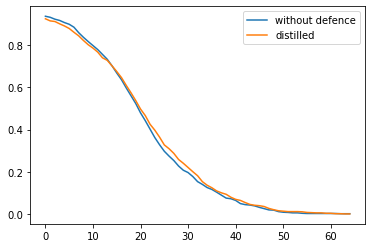

In [101]:


accuracy = []
accuracy_dist = []
for i in iterations:
  accuracy.append(1 - sum(insights['iterations']<=i)/Y_test_c.shape[0])
  accuracy_dist.append(1 - sum(insights_dist['iterations']<=i)/Y_test_c.shape[0])
  
plt.plot(iterations, accuracy, label='without defence')
plt.plot(iterations, accuracy_dist, label='distilled')
#plt.savefig('images/accuracy_T_10.png')
plt.legend()
plt.show()

In [102]:
r_o =  robustness(initial, adversarial)
r_d_7 = robustness(initial_dist, adversarial_dist)
print('original', r_o)
print('defended', r_d_7)

original 1.7175781265375332
defended 1.7547465836079432


In [103]:
(r_d_7 - r_o)/r_o

0.02164003866615254

In [29]:
plt.savefig('images/accuracy_T_10.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy = []
# accuracy_dist = []
# for e in epsilons:
#   accuracy.append(1 - sum(insights['epsilon']==e)/Y_test_c.shape[0])
#   accuracy_dist.append(1 - sum(insights_dist['epsilon']==e)/Y_test_c.shape[0])
  
plt.plot(test_epsilon, 1 - df['successful attempts']/300, label='without defence')
plt.plot(test_epsilon, 1 - df_dist['successful attempts']/300, label='distilled')
plt.legend()
plt.show()

Something wrong. Probably algorithm stop condition is uncorrect. Also will be nice to extract samples with initially incorrect classification.

In [ ]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

In [39]:
Y_train_hat = cls_dist.predict(X_train)
Y_test_hat = cls_dist.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

NameError: name 'cls_dist' is not defined

In [ ]:
# pretrub_by_iter = non_targeted.groupby('iterations', as_index=False)['L2 norm'].mean()
# pretrub_by_iter = pretrub_by_iter.sort_values("iterations")

# plt.plot(pretrub_by_iter['iterations'], pretrub_by_iter['L2 norm'])

In [ ]:
# accuracy_t = []
# for iter in pretrub_by_iter["iterations"].values:
#     accuracy_t.append(1 - non_targeted[non_targeted["iterations"]<=iter].shape[0]/total_attempts)
    
# iterations_t = pretrub_by_iter["iterations"].values

In [ ]:
# FGSM_t, = plt.plot(iterations_t, accuracy_t, 'g-', label='TFGSM')

In [ ]:
def L2_norm(x, axis=0):
  return np.sqrt(np.square(x).sum(axis=axis))